## Observations and Insights 

In [149]:
#Observations
#1. Based on the box plot, Capomulin and Ramicane have smaller final tumor volumes than infubinol and ceftamin. 
#2. While on the Capomulin regimen, mouse b128 showed steady avg. decline in tumor volume hitting the smallest tumor volume around 35 days, but showed steady tumor growth after dat 35. 
#3. Based on the regression model, it looks like there is a relationship between mouse weight and avg. tumor volume: for mice on capomulin, in general, the more a mouse weighs, the larger the tumor will be. 


In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [151]:
# Checking the number of mice.
mice = combine_data["Mouse ID"].value_counts()
mice_number = len(mice)
mice_number

249

In [153]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combine_data.loc[combine_data.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [155]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
good_data = combine_data[combine_data['Mouse ID'].isin(duplicates)==False]


In [157]:
# Checking the number of mice in the clean DataFrame.
actual_mice = good_data["Mouse ID"].value_counts()
actual_mice_count = len(actual_mice)
actual_mice_count

248

## Summary Statistics

In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_mean = good_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean

regimen_median = good_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median

regimen_variance = good_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance

regimen_std = good_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = good_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

summary_df = pd.DataFrame({"mean": regimen_mean, "meadian": regimen_median, "variance": regimen_variance, "Standard Deviation": regimen_std, "sem": regimen_sem})
summary_df

,mean,meadian,variance,Standard Deviation,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [161]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
new_summary_df = good_data.groupby('Drug Regimen')
new_table_df = new_summary_df.agg(['mean','median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
new_table_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

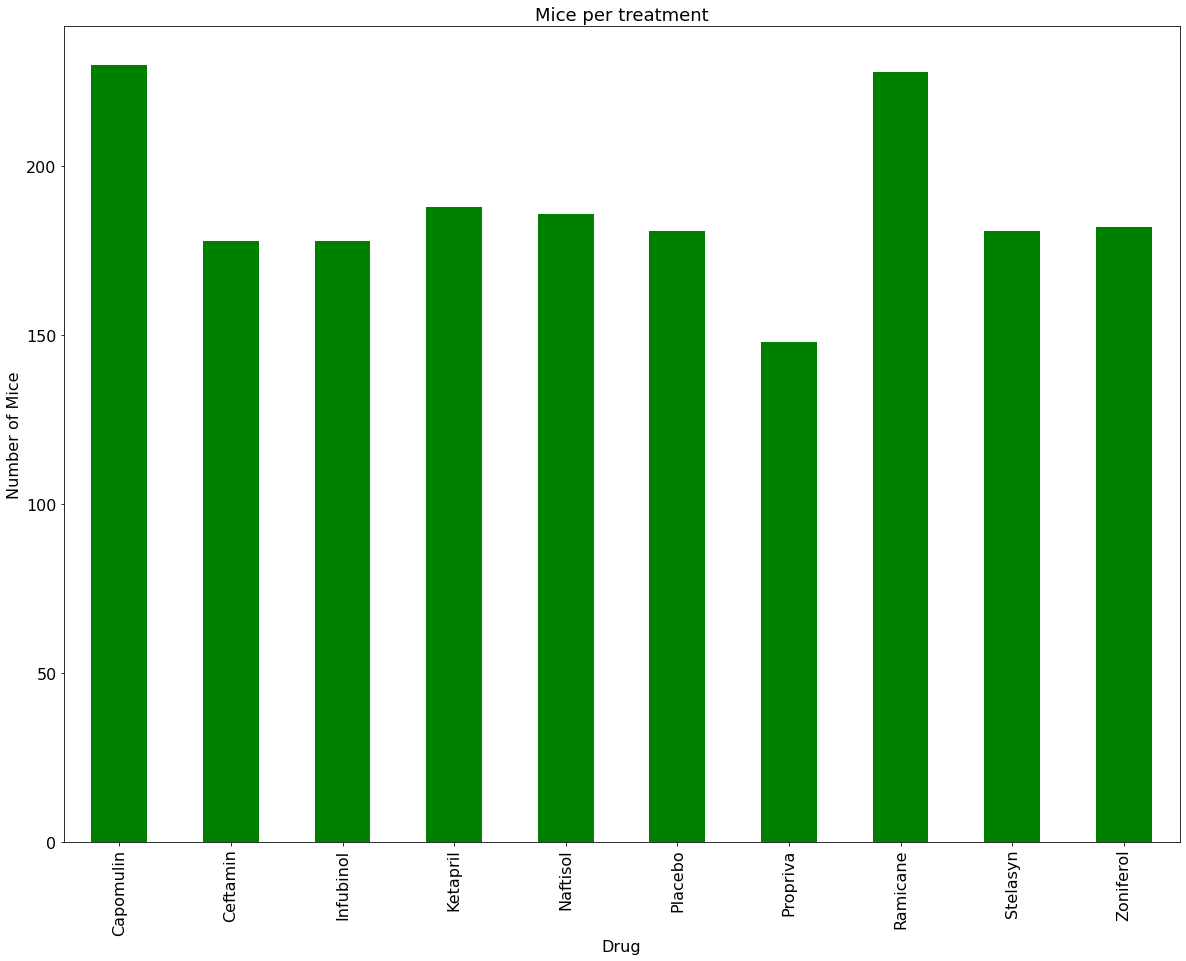

In [162]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_drug = good_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_per_drug
plot_pandas = mice_per_drug.plot.bar(figsize=(20, 15), color='g', fontsize = 16)
plt.xlabel("Drug", fontsize = 16)
plt.ylabel("Number of Mice", fontsize = 16)
plt.title("Mice per treatment", fontsize = 18)
plt.show()


Text(0.5, 1.0, 'Mice per treatment')

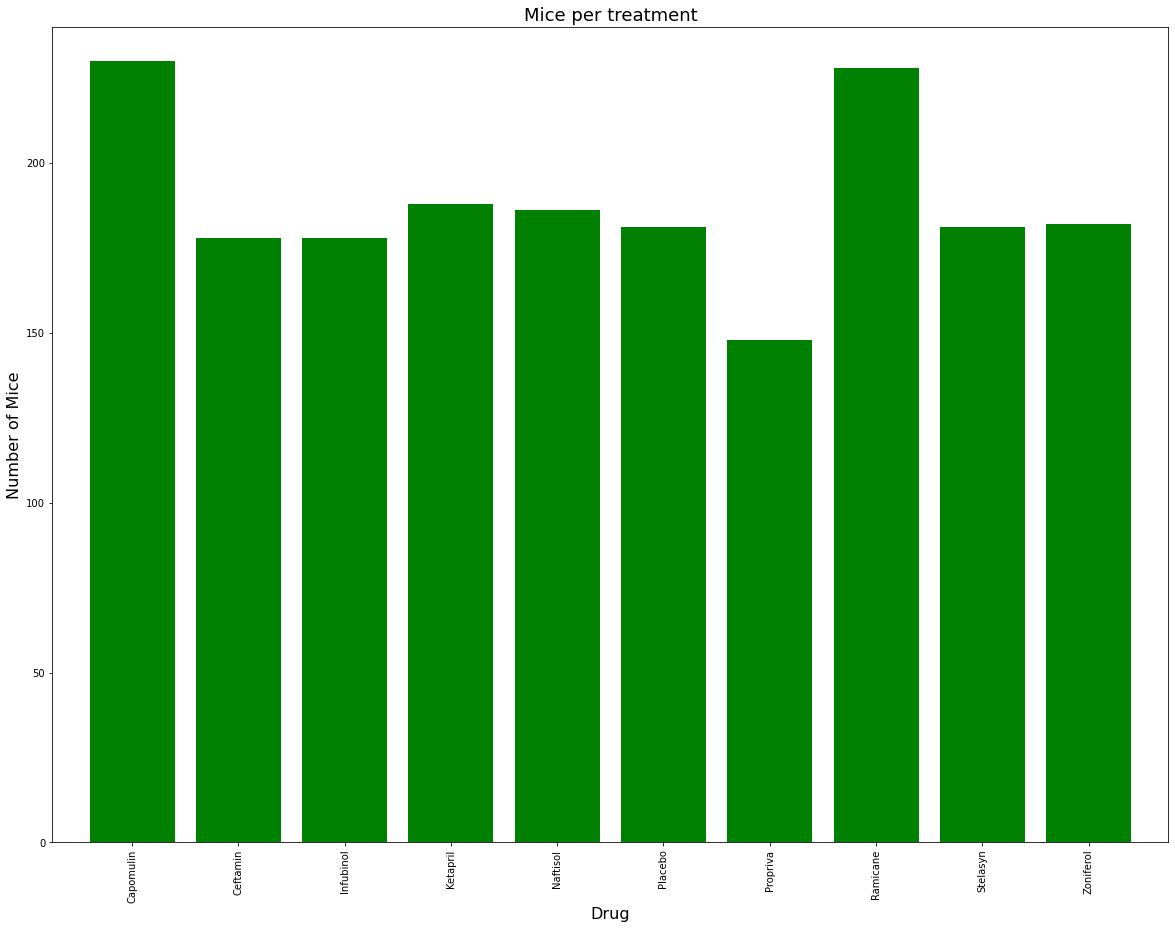

In [164]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_per = (good_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_per
x_axis = np.arange(len(mice_per_drug))
fig1, ax1 = plt.subplots(figsize=(20,15))
plt.bar(x_axis, mice_per, color='g', align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation='vertical')
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(mice_per)+10)
plt.xlabel("Drug", fontsize = 16)
plt.ylabel("Number of Mice", fontsize = 16)
plt.title("Mice per treatment", fontsize = 18)

<ipython-input-165-4f7e0ff2c3bc>:13: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis("equal", fontsize = 16)


<function matplotlib.pyplot.show(*args, **kw)>

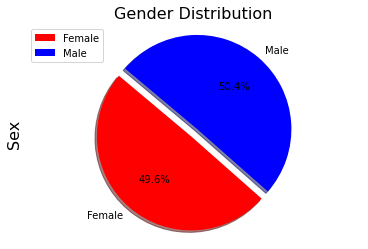

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = good_data.groupby(["Mouse ID", "Sex"])
gender
gender_groups_df = pd.DataFrame(gender.size())
mouse_dem = pd.DataFrame(gender_groups_df.groupby(["Sex"]).count())
mouse_dem.columns = ["Total Count"]
mouse_dem["Percentage of Sex"] = (100*(mouse_dem["Total Count"]/mouse_dem["Total Count"].sum()))
mouse_dem
explode = (0.1, 0)
colors = ['red', 'blue']
plot = mouse_dem.plot.pie(y='Total Count', colors = colors, explode = explode, autopct="%1.1f%%", shadow=True, startangle=140)
plt.ylabel('Sex', fontsize = 16)
plt.axis("equal", fontsize = 16)
plt.title('Gender Distribution', fontsize = 16)
plt.show

<ipython-input-166-a6254f34bd18>:8: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis("equal", fontsize = 16)


<function matplotlib.pyplot.show(*args, **kw)>

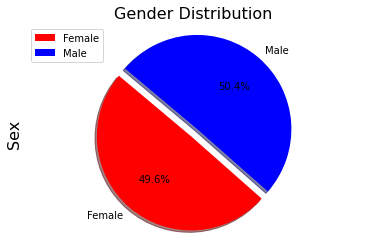

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.6, 50.4]
colors = ['red', 'blue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.ylabel('Sex', fontsize = 16)
plt.axis("equal", fontsize = 16)
plt.title('Gender Distribution', fontsize = 16)
plt.legend(labels, loc="upper left")
plt.show


## Quartiles, Outliers and Boxplots

In [167]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_df = good_data.loc[good_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = good_data.loc[good_data["Drug Regimen"] == "Ramicane",:]
infubinol_df = good_data.loc[good_data["Drug Regimen"] == "Infubinol",:]
ceftamin_df = good_data.loc[good_data["Drug Regimen"] == "Ceftamin",:]

capomulin_timepoint = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_timepoint
new_capomulin = pd.DataFrame(capomulin_timepoint)
capomulin_merge = pd.merge(new_capomulin, good_data, on=("Mouse ID", "Timepoint"),how="left")
capomulin_merge.head()

ramicane_timepoint = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_timepoint
new_ramicane = pd.DataFrame(ramicane_timepoint)
ramicane_merge = pd.merge(new_ramicane, good_data, on=("Mouse ID", "Timepoint"),how="left")
ramicane_merge.head() 

infubinol_timepoint = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_timepoint
new_infubinol = pd.DataFrame(infubinol_timepoint)
infubinol_merge = pd.merge(new_infubinol, good_data, on=("Mouse ID", "Timepoint"),how="left")
infubinol_merge.head() 

ceftamin_timepoint = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_timepoint
new_ceftamin = pd.DataFrame(ceftamin_timepoint)
ceftamin_merge = pd.merge(new_ceftamin, good_data, on=("Mouse ID", "Timepoint"),how="left")
ceftamin_merge.head() 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [168]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['capomulin', 'ramicane', 'infubinol', 'ceftamin']

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
capomulin_tumor = capomulin_merge["Tumor Volume (mm3)"]
quartiles = capomulin_tumor.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile
upper_out = upper_quartile + (1.5*iqr)
lower_out = lower_quartile - (1.5*iqr)
print(f"lower quartile for capomulin tumors is {lower_quartile}")
print(f"upper quartile for capomulin tumors is {upper_quartile}")
print(f"any value above {upper_out} is a potential outliar")
print(f"any value below {lower_out} is a potetnail outliar")
print("___________________________________________________")

ramicane_tumor = ramicane_merge["Tumor Volume (mm3)"]
ram_quartiles = ramicane_tumor.quantile([.25,.5,.75])
ram_lower_quartile = ram_quartiles[0.25]
ram_upper_quartile = ram_quartiles[0.75]
ram_iqr = ram_upper_quartile-ram_lower_quartile
ram_upper_out = ram_upper_quartile + (1.5*iqr)
ram_lower_out = ram_lower_quartile - (1.5*iqr)
print(f"lower quartile for ramicane tumors is {ram_lower_quartile}")
print(f"upper quartile for ramicane tumors is {ram_upper_quartile}")
print(f"any value above {ram_upper_out} is a potential outliar")
print(f"any value below {ram_lower_out} is a potetnail outliar")
print("___________________________________________________")

infubinol_tumor = infubinol_merge["Tumor Volume (mm3)"]
inf_quartiles = infubinol_tumor.quantile([.25,.5,.75])
inf_lower_quartile = inf_quartiles[0.25]
inf_upper_quartile = inf_quartiles[0.75]
inf_iqr = inf_upper_quartile-inf_lower_quartile
inf_upper_out = inf_upper_quartile + (1.5*iqr)
inf_lower_out = inf_lower_quartile - (1.5*iqr)
print(f"lower quartile for infubinol tumors is {inf_lower_quartile}")
print(f"upper quartile for infubinol tumors is {inf_upper_quartile}")
print(f"any value above {inf_upper_out} is a potential outliar")
print(f"any value below {inf_lower_out} is a potetnail outliar")
print("___________________________________________________")

ceftamin_tumor = ceftamin_merge["Tumor Volume (mm3)"]
cef_quartiles = ceftamin_tumor.quantile([.25,.5,.75])
cef_lower_quartile = cef_quartiles[0.25]
cef_upper_quartile = cef_quartiles[0.75]
cef_iqr = cef_upper_quartile-cef_lower_quartile
cef_upper_out = cef_upper_quartile + (1.5*iqr)
cef_lower_out = cef_lower_quartile - (1.5*iqr)
print(f"lower quartile for ceftamin tumors is {cef_lower_quartile}")
print(f"upper quartile for ceftamin tumors is {cef_upper_quartile}")
print(f"any value above {cef_upper_out} is a potential outliar")
print(f"any value below {cef_lower_out} is a potetnail outliar")


lower quartile for capomulin tumors is 32.37735684
upper quartile for capomulin tumors is 40.1592203
any value above 51.83201549 is a potential outliar
any value below 20.70456164999999 is a potetnail outliar
___________________________________________________
lower quartile for ramicane tumors is 31.56046955
upper quartile for ramicane tumors is 40.65900627
any value above 52.33180146000001 is a potential outliar
any value below 19.887674359999995 is a potetnail outliar
___________________________________________________
lower quartile for infubinol tumors is 54.04860769
upper quartile for infubinol tumors is 65.52574285
any value above 77.19853804 is a potential outliar
any value below 42.375812499999995 is a potetnail outliar
___________________________________________________
lower quartile for ceftamin tumors is 48.72207785
upper quartile for ceftamin tumors is 64.29983003
any value above 75.97262522 is a potential outliar
any value below 37.04928265999999 is a potetnail outliar


<function matplotlib.pyplot.show(*args, **kw)>

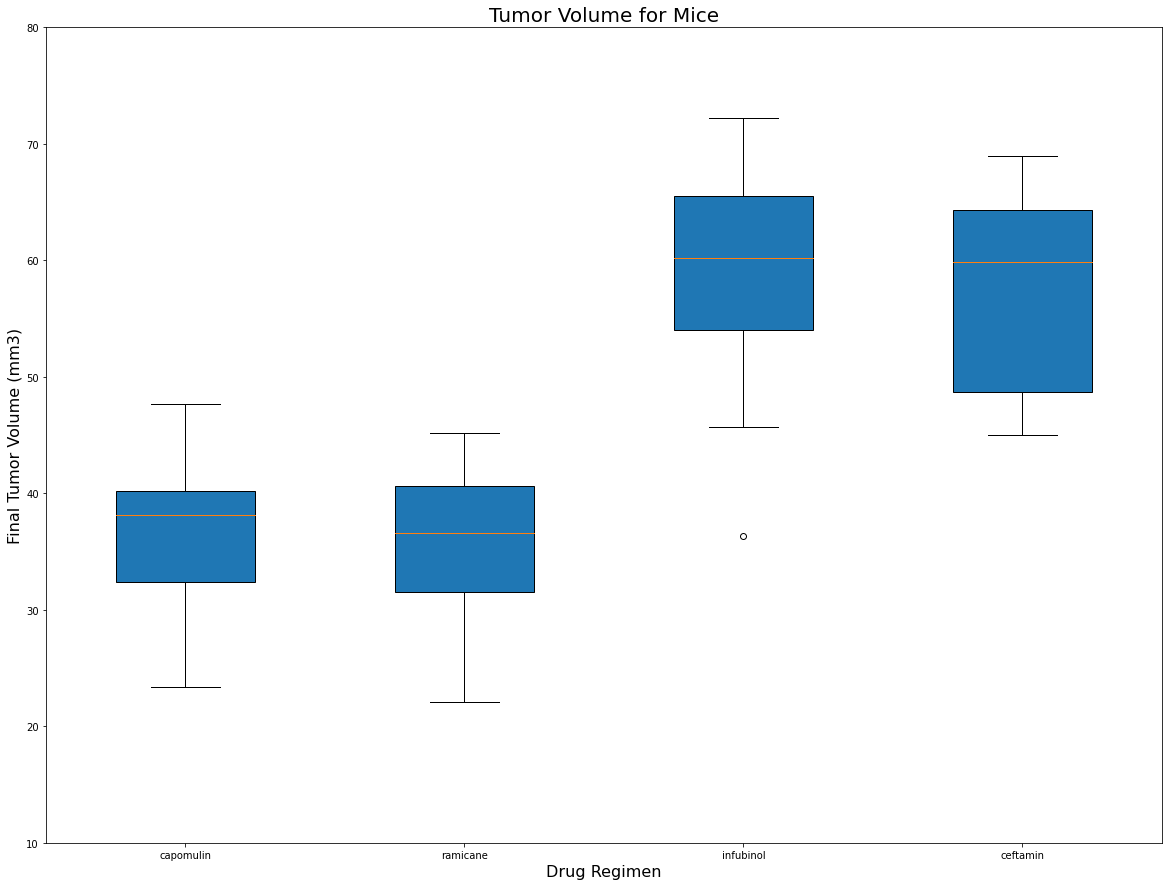

In [169]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data = [capomulin_tumor, ramicane_tumor, infubinol_tumor, ceftamin_tumor]
fig1, ax1 = plt.subplots(figsize=(20,15))
ax1.set_xlabel('Drug Regimen', fontsize = 16)
ax1.set_ylabel('Final Tumor Volume (mm3)', fontsize = 16)
ax1.set_title('Tumor Volume for Mice', fontsize = 20)
ax1.boxplot(tumor_data, labels=regimen, widths = 0.5, patch_artist=True, vert=True)
plt.ylim(10,80)
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

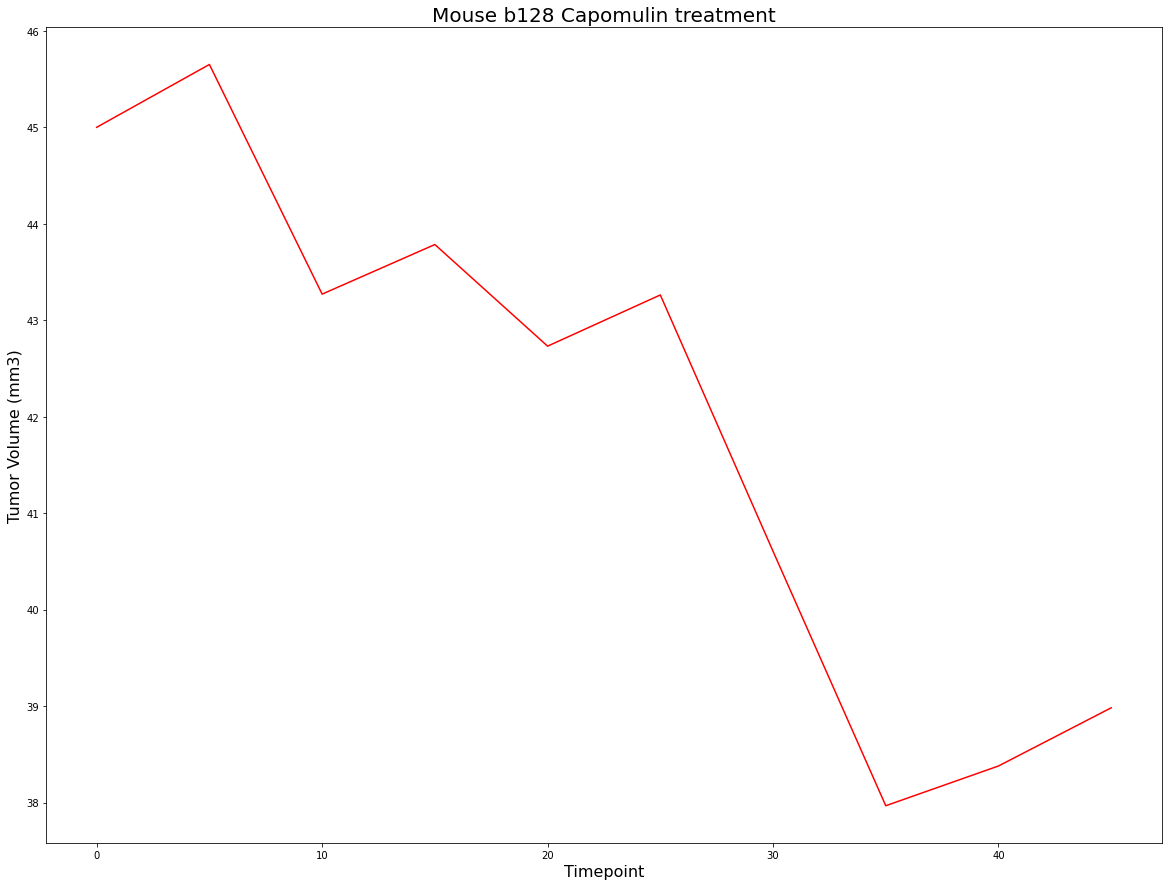

In [170]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128",:]
line_mouse.head()
tumor_volume = line_mouse["Tumor Volume (mm3)"]
time_point_data = line_mouse["Timepoint"]
fig1, ax1 = plt.subplots(figsize=(20, 15))
plt.xlabel('Timepoint', fontsize = 16)
plt.ylabel('Tumor Volume (mm3)', fontsize = 16)
plt.title('Mouse b128 Capomulin treatment', fontsize = 20)
plt.plot(time_point_data, tumor_volume, color="red")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

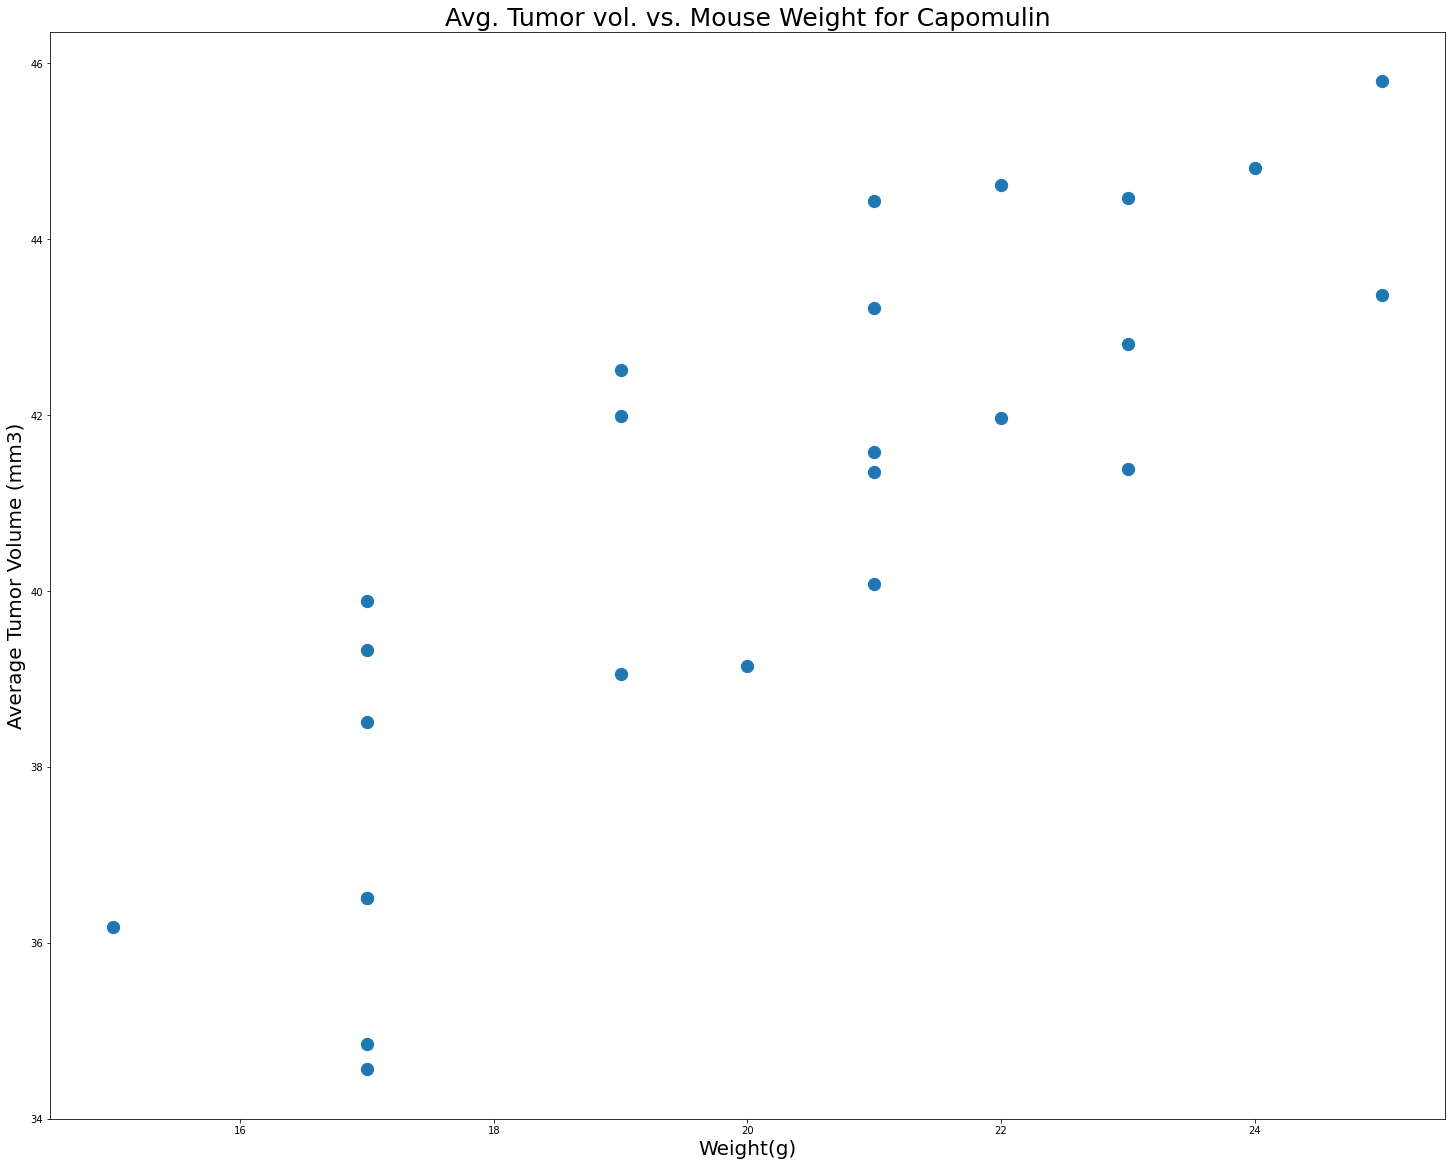

In [171]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(25,20))
scat_data = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(scat_data['Weight (g)'], scat_data['Tumor Volume (mm3)'], s=150)
plt.show
plt.xlabel('Weight(g)', fontsize = 20)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 20)
plt.title('Avg. Tumor vol. vs. Mouse Weight for Capomulin',fontsize = 25)
plt.show


## Correlation and Regression

Correlation between mouse weight and avg. tumor vol. is 0.84
slope equals: 0.9544396890241045
intercept equals: 21.552160532685015
rvalue equals: 0.8419363424694718
pvalue equals: 1.3225722434712642e-07
stderr equals: 0.1275435903320134
y = 0.95x + 21.55
__________________________________________________________



<ipython-input-175-acc658f633e2>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


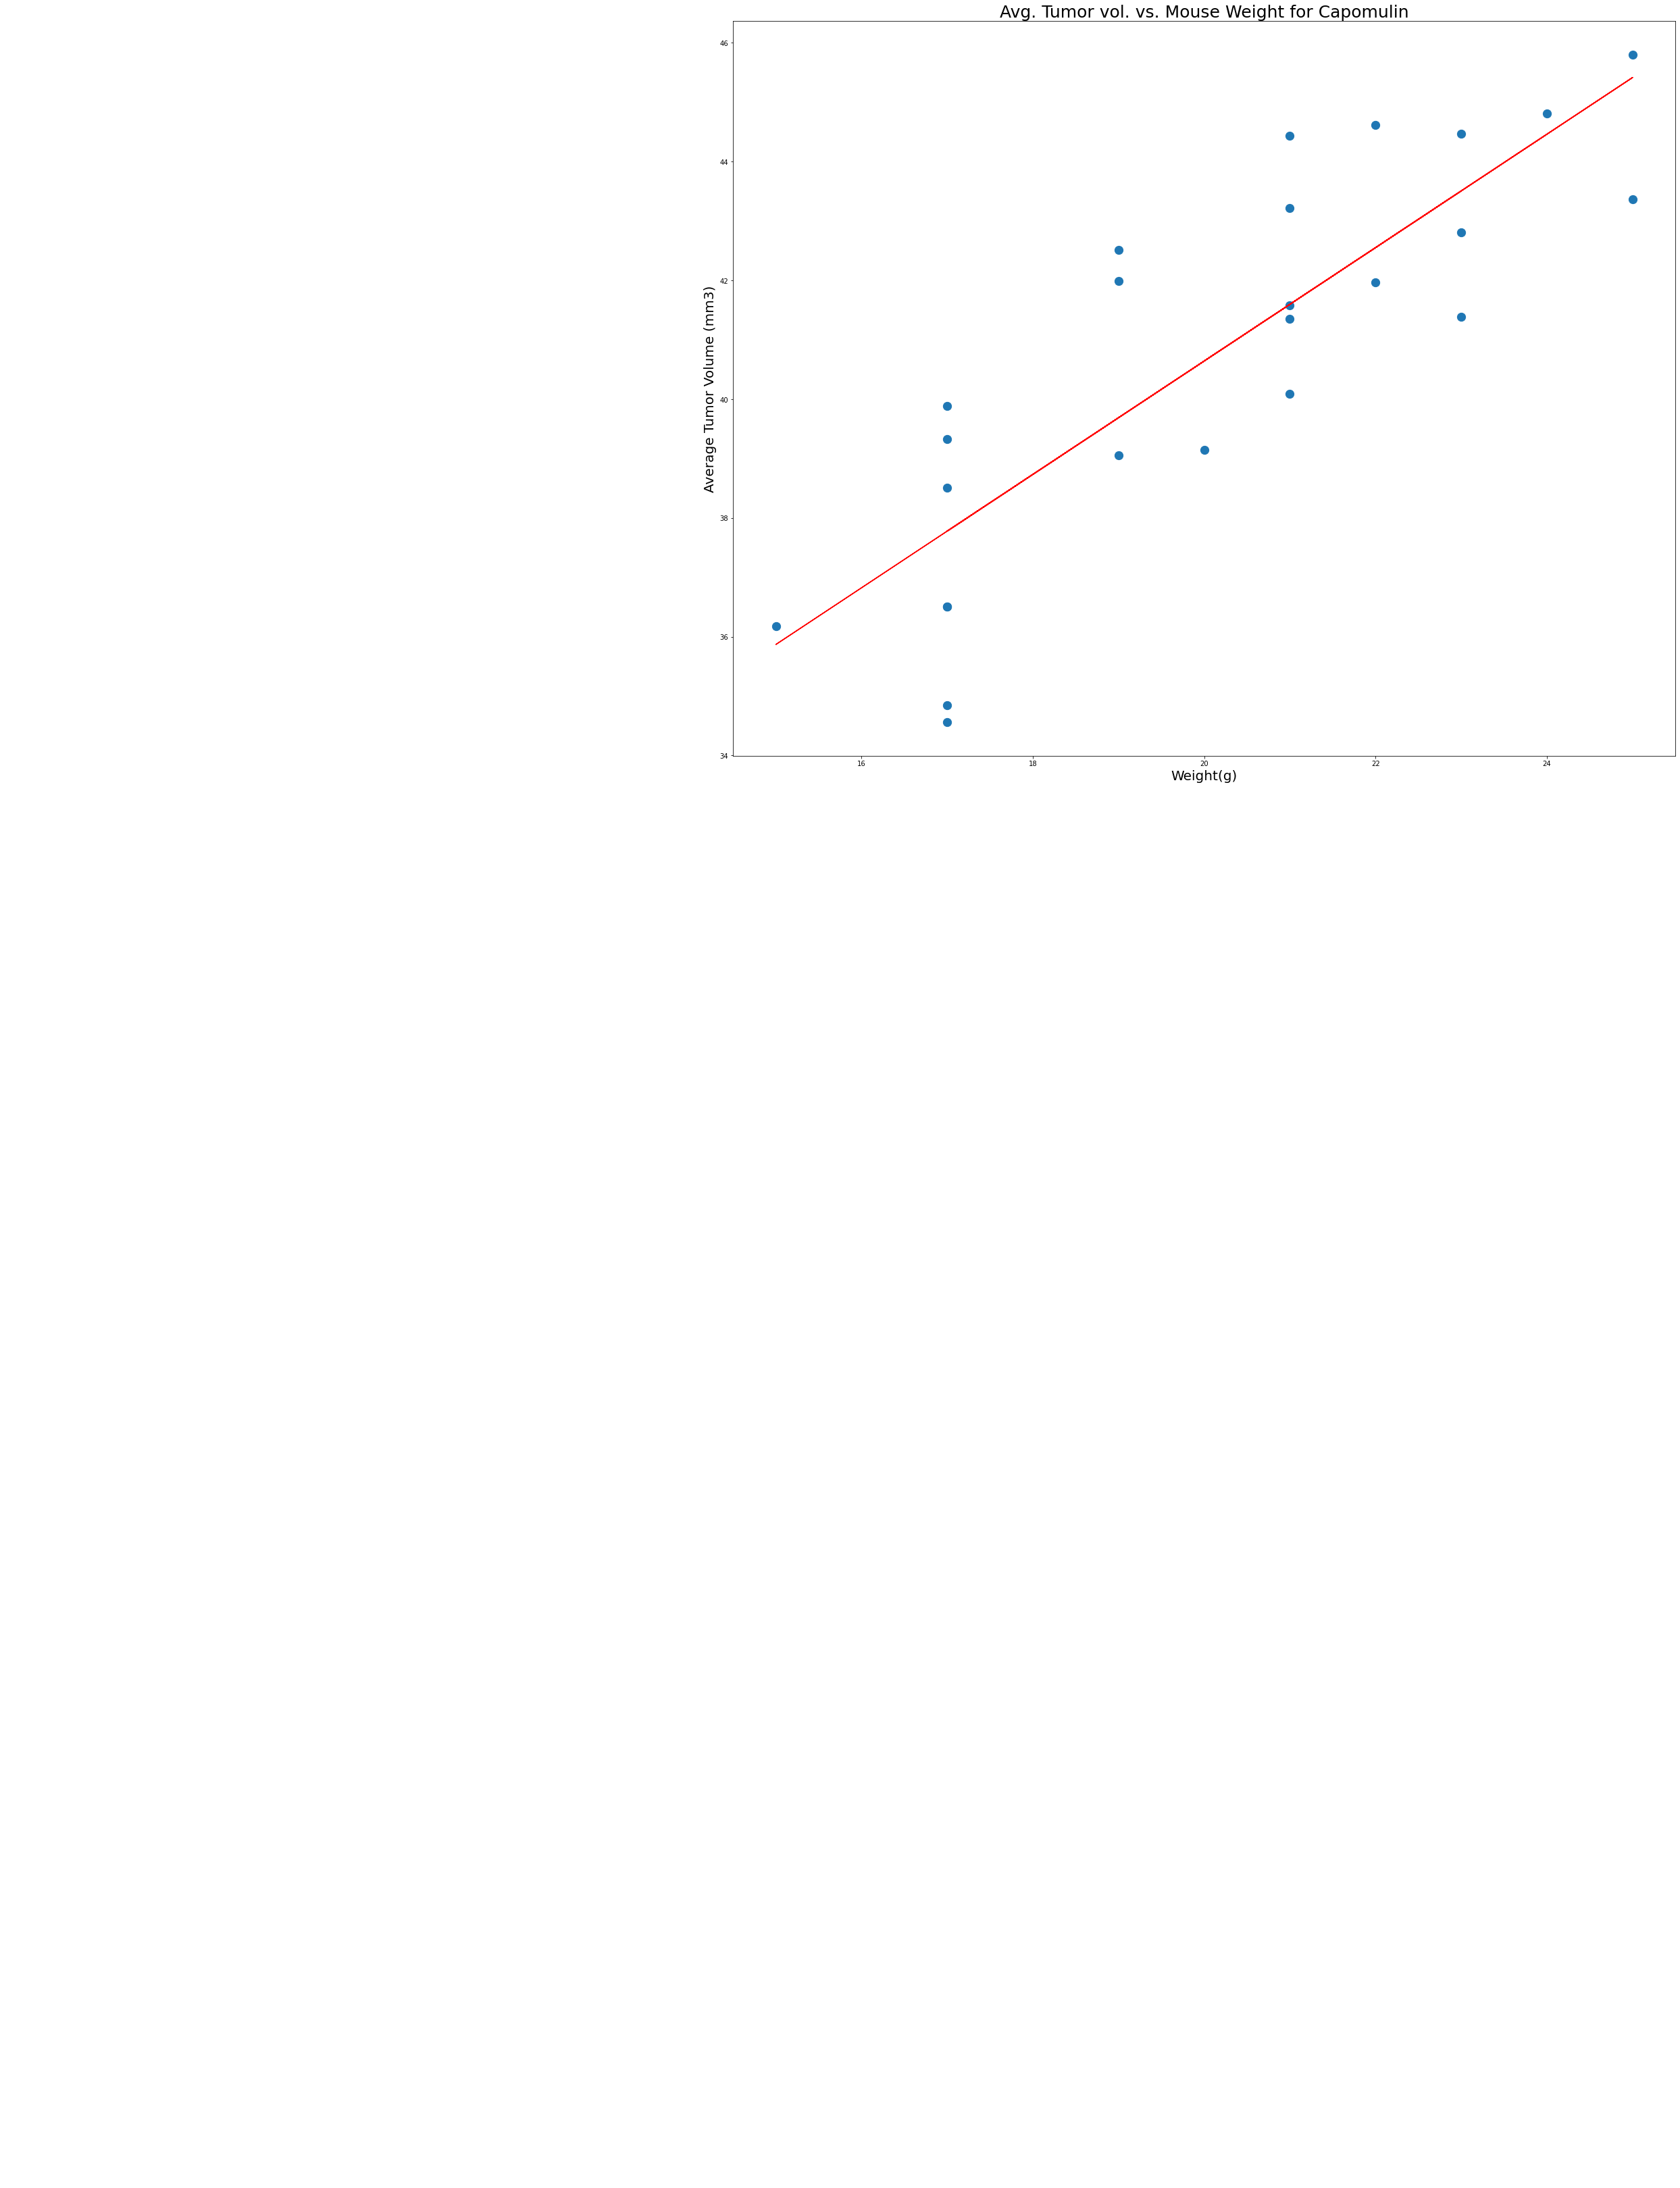

In [175]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(scat_data['Weight (g)'], scat_data['Tumor Volume (mm3)'])[0],2)
print(f"Correlation between mouse weight and avg. tumor vol. is {correlation}")

x_data = scat_data['Weight (g)']
y_data = scat_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
print(f"slope equals: {slope}")
print(f"intercept equals: {intercept}")
print(f"rvalue equals: {rvalue}")
print(f"pvalue equals: {pvalue}")
print(f"stderr equals: {stderr}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("__________________________________________________________\n")

fig1, ax1 = plt.subplots(figsize=(25,20))
plt.scatter(scat_data['Weight (g)'], scat_data['Tumor Volume (mm3)'], s=150)
plt.plot(x_data,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight(g)', fontsize = 20)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 20)
plt.title('Avg. Tumor vol. vs. Mouse Weight for Capomulin',fontsize = 25)
plt.tight_layout()
plt.show()
      

<ipython-input-176-078eea2902d6>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


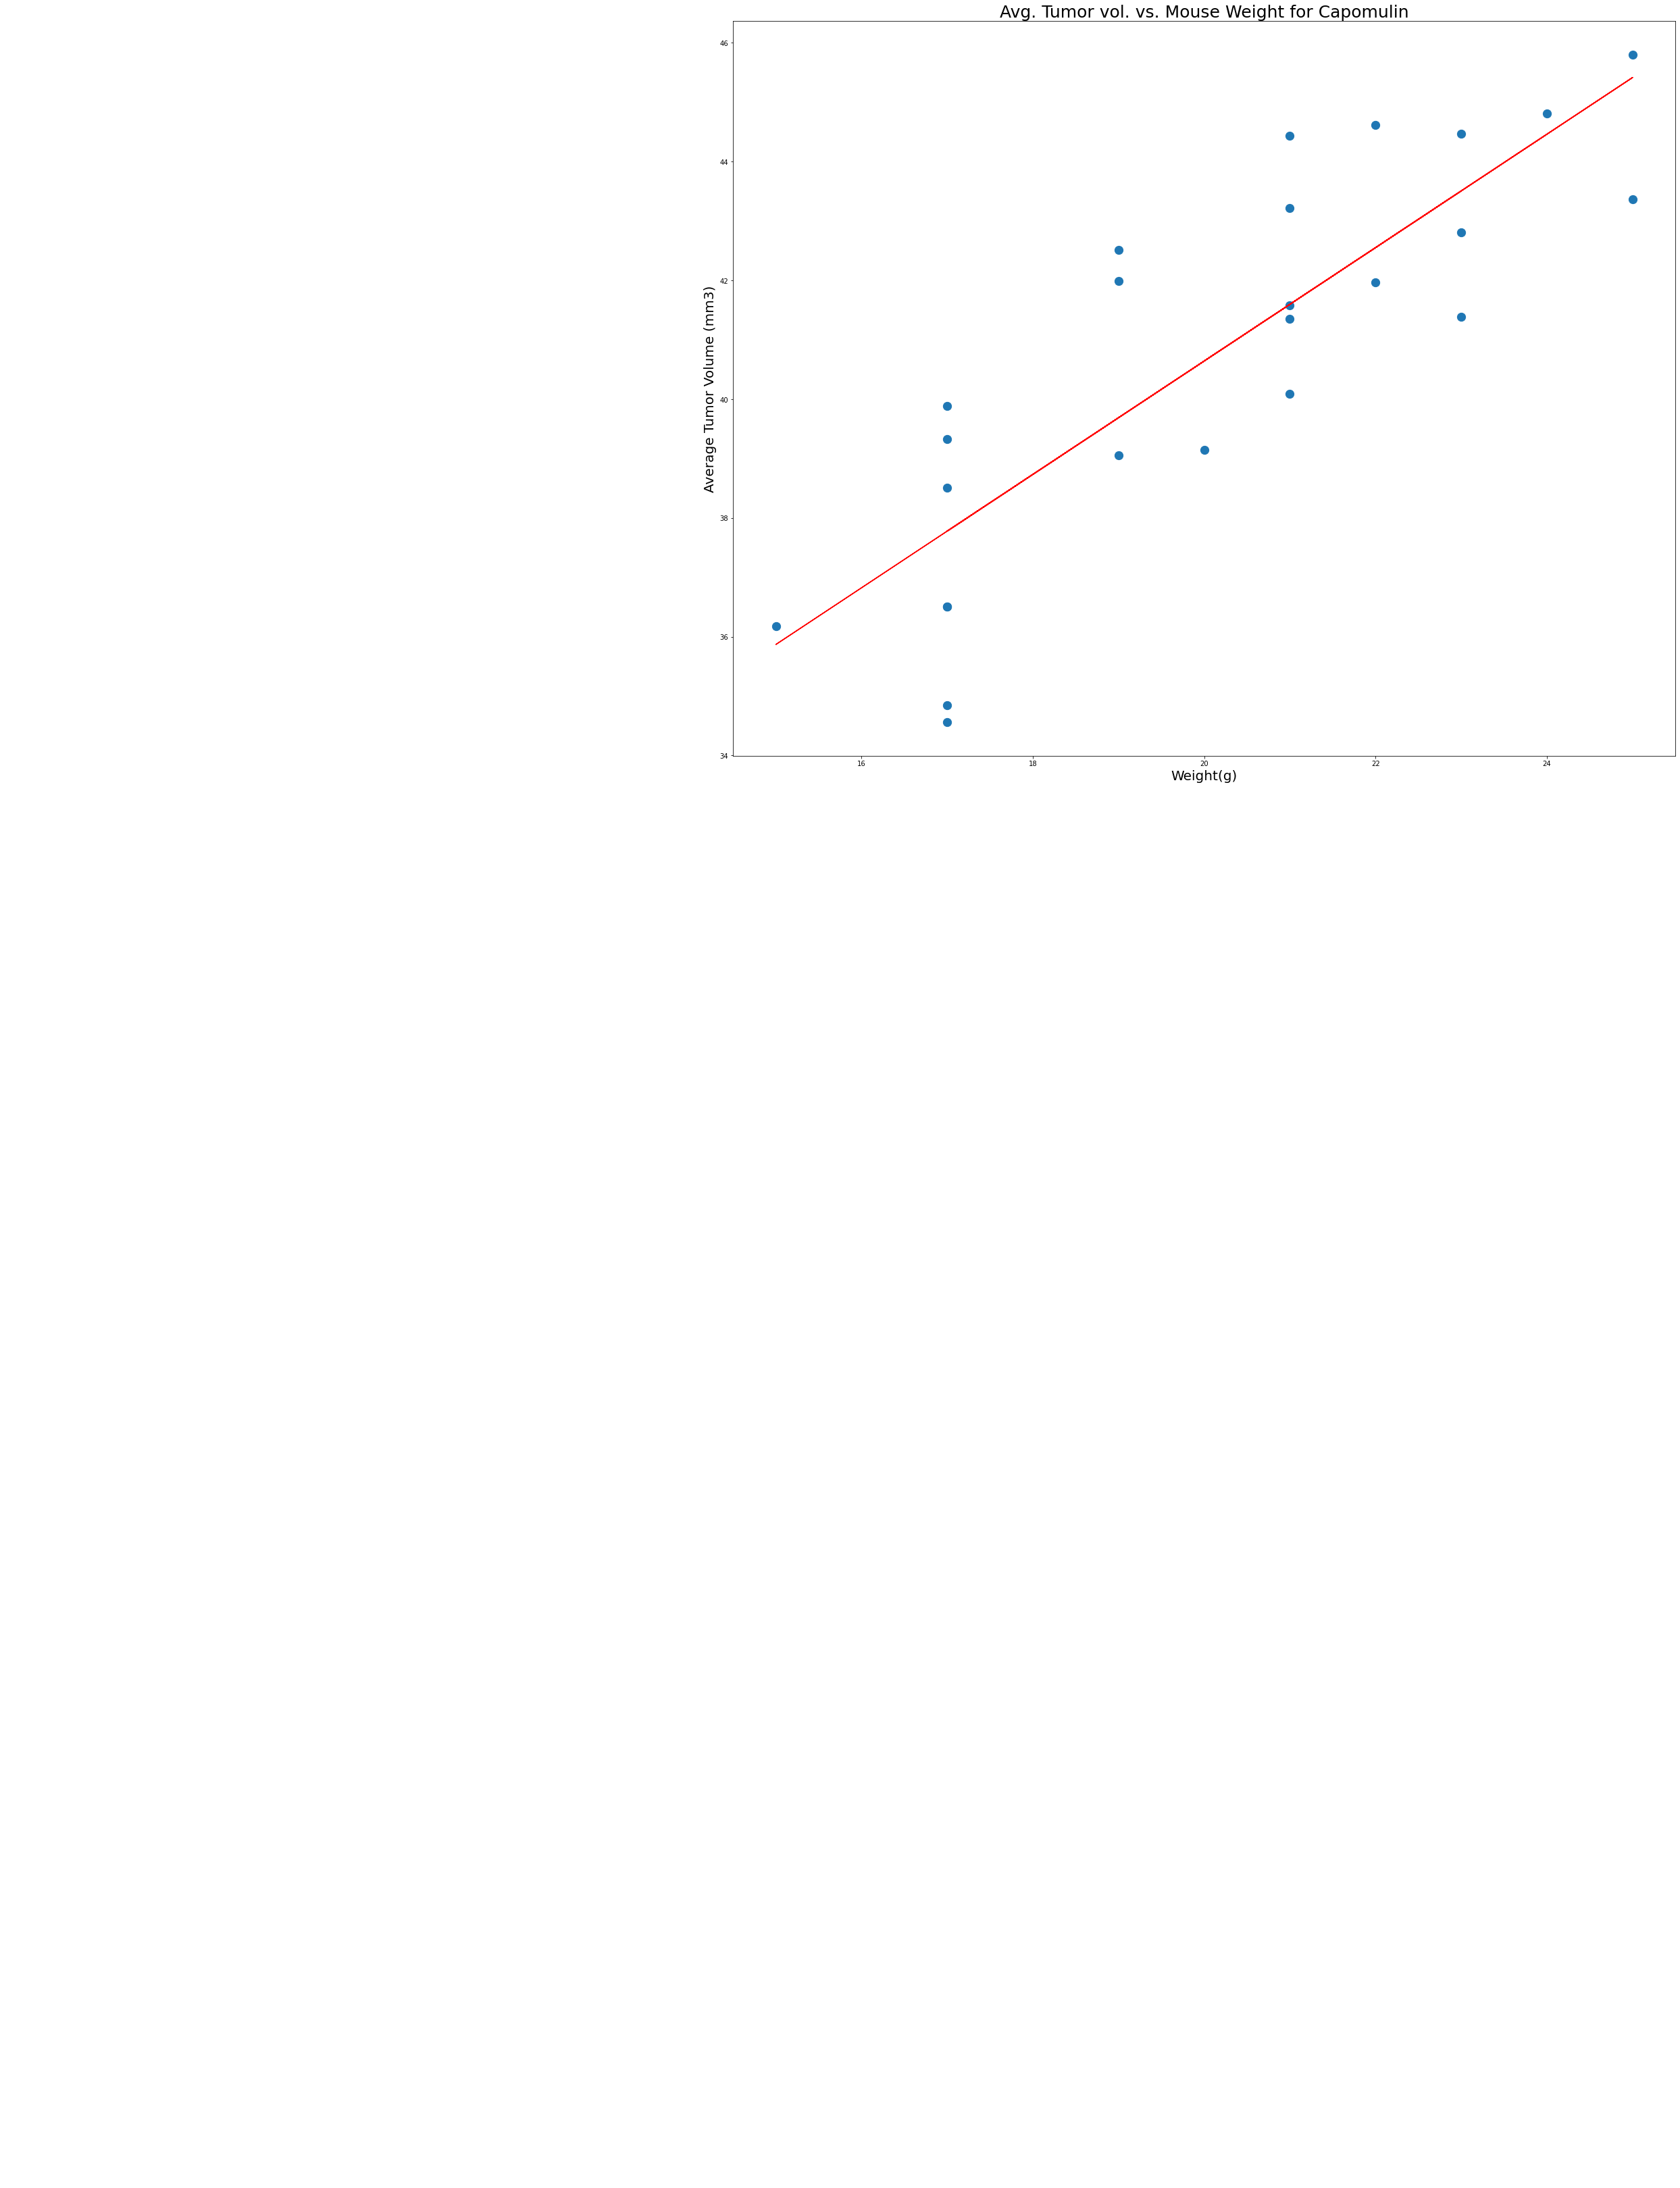

In [176]:
fig1, ax1 = plt.subplots(figsize=(25,20))
plt.scatter(scat_data['Weight (g)'], scat_data['Tumor Volume (mm3)'], s=150)
plt.plot(x_data,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight(g)', fontsize = 20)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 20)
plt.title('Avg. Tumor vol. vs. Mouse Weight for Capomulin',fontsize = 25)
plt.tight_layout()
plt.show()